<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/YB_1128_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sales = pd.read_csv("/content/drive/MyDrive/Colab/ESAA/product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [7]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [10]:
#모델 생성
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=3)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [12]:
kmeans.fit(sales)
pred=kmeans.predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [15]:
sales['cluster']=pred
print(sales)

     tot_price  visit_count  buy_count  avg_price  cluster
0          5.0          0.2        3.0        1.6        1
1          5.0          0.4        3.4        1.6        1
2          5.2          0.2        3.5        1.5        1
3          5.2          0.2        3.0        1.4        1
4          4.7          0.2        3.2        1.6        1
..         ...          ...        ...        ...      ...
145        5.4          0.2        3.4        1.7        1
146        5.1          0.4        2.0        1.5        1
147        4.6          0.2        3.6        1.0        1
148        5.1          0.5        3.3        1.7        1
149        4.8          0.2        3.4        1.9        1

[150 rows x 5 columns]


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [16]:
salesDF=sales.drop('cluster',axis=1)
salesDF.head(5)

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [19]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca=PCA(n_components=2)
pca.fit(salesDF)
pca_transfromed=pca.fit_transform(salesDF)
#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x']=pca_transfromed[:,0]
sales['pca_y']=pca_transfromed[:,1]
print(sales)

     tot_price  visit_count  buy_count  avg_price  cluster     pca_x     pca_y
0          5.0          0.2        3.0        1.6        1 -2.516330 -0.074159
1          5.0          0.4        3.4        1.6        1 -2.466679  0.231335
2          5.2          0.2        3.5        1.5        1 -2.557365  0.456400
3          5.2          0.2        3.0        1.4        1 -2.615332  0.073586
4          4.7          0.2        3.2        1.6        1 -2.636320 -0.087265
..         ...          ...        ...        ...      ...       ...       ...
145        5.4          0.2        3.4        1.7        1 -2.307650  0.459164
146        5.1          0.4        2.0        1.5        1 -2.438281 -0.812282
147        4.6          0.2        3.6        1.0        1 -3.209592  0.272175
148        5.1          0.5        3.3        1.7        1 -2.303085  0.185912
149        4.8          0.2        3.4        1.9        1 -2.353797  0.081088

[150 rows x 7 columns]


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

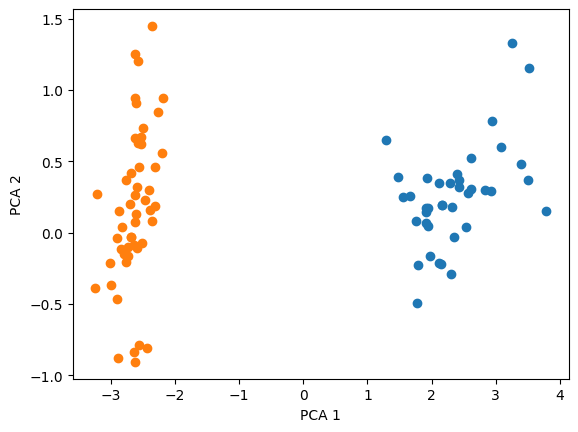

In [20]:
marker0_ind=sales[sales['cluster']==0].index
marker1_ind=sales[sales['cluster']==1].index

plt.scatter(x=sales.loc[marker0_ind,'pca_x'],y=sales.loc[marker0_ind,'pca_y'])
plt.scatter(x=sales.loc[marker1_ind,'pca_x'],y=sales.loc[marker1_ind,'pca_y'])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [21]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [22]:
#sales의 모든 데이터에 실루엣 계수 구하기
score_samples=silhouette_samples(sales_data, sales['cluster'])
print('silhouette_samples() return 값의 shape',score_samples.shape)

silhouette_samples() return 값의 shape (150,)


In [23]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff']=score_samples
print(sales)

     tot_price  visit_count  buy_count  avg_price  cluster  silhouette_coeff
0          5.0          0.2        3.0        1.6        1          0.790444
1          5.0          0.4        3.4        1.6        1          0.802792
2          5.2          0.2        3.5        1.5        1          0.806967
3          5.2          0.2        3.0        1.4        1          0.788204
4          4.7          0.2        3.2        1.6        1          0.800030
..         ...          ...        ...        ...      ...               ...
145        5.4          0.2        3.4        1.7        1          0.756049
146        5.1          0.4        2.0        1.5        1          0.574301
147        4.6          0.2        3.6        1.0        1          0.767749
148        5.1          0.5        3.3        1.7        1          0.768826
149        4.8          0.2        3.4        1.9        1          0.748631

[150 rows x 6 columns]


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [24]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score=silhouette_score(sales_data, sales['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
sales.head(5)

Silhouette Analysis Score:0.536


,tot_price,visit_count,buy_count,avg_price,cluster,silhouette_coeff
0,5.0,0.2,3.0,1.6,1,0.790444
1,5.0,0.4,3.4,1.6,1,0.802792
2,5.2,0.2,3.5,1.5,1,0.806967
3,5.2,0.2,3.0,1.4,1,0.788204
4,4.7,0.2,3.2,1.6,1,0.800030


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [26]:
#군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.436312
1,0.754441
2,0.421443
